# **Part 1: Get started**
For this part, we are just getting things set up!

1) Set up a GitHub repository.

2) Use Pandas to read in the sales prediction data set into a Google Colab Notebook.  

3) Add the Google Colab Notebook to your GitHub repository.


## Import Libraries

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [64]:
df = pd.read_csv('sales_predictions_2023.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Copy Data

In [65]:
df1 = df.copy()

# **Part 2: Data Preparation**
Address each of the following tasks:

1) How many rows and columns?

2) What are the datatypes of each variable?

3) Are there duplicates? If so, drop any duplicates.

4) Identify missing values.

5) Decide on how to address the missing values and do it!

6) Confirm that there are no missing values after addressing them.

7) Find and fix any inconsistent categories of data.

8) For any numerical columns, obtain the summary statistics of each (min, max, mean).

## Data operations

In [66]:
# Number of rows and columns?
df1.shape

(8523, 12)

In [67]:
# Datatypes of each variable
df1.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [68]:
# Check for duplicates
df1.duplicated().sum()

0

In [69]:
# Identify missing values
df1.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [70]:
# identify % of missing values
df1.isna().sum()/len(df1)*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

**Interpretation:**
*   There are 1463 missing values in the 'Item_Weight' column.(17.16%)
*   There are 2410 missing values in the 'Outlet_Size' column.(28.27%)

To deal with the missing values, we should address them and do some additional EDA.

In [71]:
# Adress the missing values in the 'Item_Weight' column
df1['Item_Weight'].value_counts()

Item_Weight
12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: count, Length: 415, dtype: int64

In [72]:
# Using three seaborn styles: dark_background, seaborn-muted and seaborn-poster.
plt.style.use('dark_background')

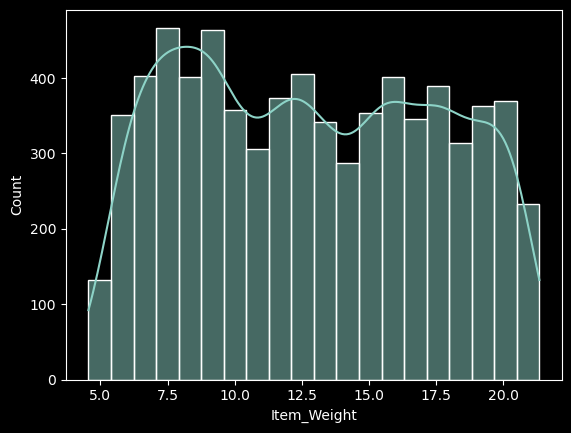

In [73]:
ax = sns.histplot(data = df1, x = 'Item_Weight', kde=True);

**Conclusion:**

We can fill in missing values with the average of 'Item_Weight' column.

In [74]:
# Fill in the missing values 'Item_Weight' column with the average
df1['Item_Weight'].fillna(value =df['Item_Weight'].mean(),inplace=True )
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [75]:
# Adress the missing values in the 'Item_Weight' column
df['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

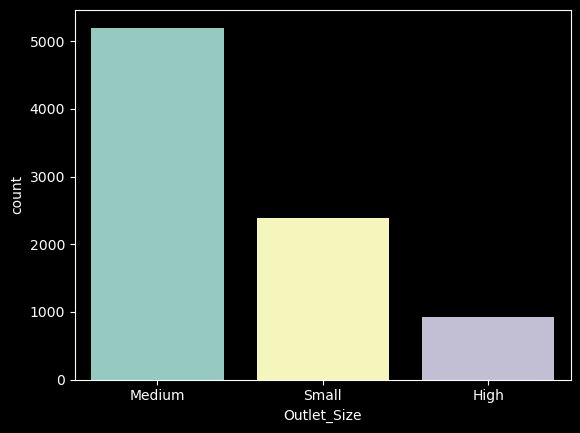

In [91]:
ax = sns.countplot(data = df1, x = 'Outlet_Size', order=df1['Outlet_Size'].value_counts().index);

**Conclusion:**

We can fill in missing values with 'Medium' because it is the most frequent category in the 'Outlet_Size' column.

In [77]:
# Fill in the missing values 'Item_Weight' column with 'Medium' because it is the most frequent
df1['Outlet_Size'].fillna(value='Medium',inplace=True)
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [78]:
# Confirm that there are no missing values
df1.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [79]:
# Select columns
data_types = df1.dtypes
cols = data_types[data_types=='object'].index
cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [80]:
# Check for inconsistency
for col in cols:
    print(f'- {col}:')
    print(df1[col].value_counts(dropna=False))
    print("\n")

- Item_Identifier:
Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64


- Item_Fat_Content:
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64


- Item_Type:
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64


- Outlet_Identifier:
Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045

*Interpretation:*

There are inconsistencies in the 'Item_Fat_Content' column:

*   'LF' and 'low fat' should be 'Low Fat'.
*   'reg' should be 'Regular'.




In [81]:
# Fix any inconsistency in the 'Item_Fat_Content' column
df1.replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg':'Regular'},inplace=True)
df1['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [82]:
# obtain the summary statistics of each (min, max, mean) for any numerical columns
statistics = df1.describe().round(2)
statistics.loc[['mean','min','max']]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
mean,12.86,0.07,140.99,1997.83,2181.29
min,4.56,0.00,31.29,1985.00,33.29
max,21.35,0.33,266.89,2009.00,13086.96


# **Part 3: Exploratory Data Analysis**
Our task is to complete any statistical analyses that might help us understand, explain, or model with our data. This must include at least one of each:
*   Histogram to view the distributions of various features in your dataset.
*   Boxplot to view statistical summaries of various features in your dataset.
*   Heatmap of the correlation between features.






In [83]:
# Make an EDA function
def plot_numeric(df1,col):
  # make the figure and axes sharing the same x-axis
  fig, axes = plt.subplots(nrows=2, figsize=(10,5), sharex=True)

  # Use seaborn plots with ax=axes[i]
  sns.histplot(data=df1,x = col,ax = axes[0], kde=True)
  mean_value = df1[col].mean()
  axes[0].axvline(mean_value,color='blue', ls='--');

  med_value = df1[col].median()
  axes[0].axvline(med_value,color='red', ls='--');

  sns.boxplot(data=df1, x = col, ax = axes[1])

  # Updating title of top graph
  axes[0].set_title(f'EDA for {col}', fontsize = 15)

  # Fixing any overlapping labels and showing
  plt.tight_layout()
  plt.show()

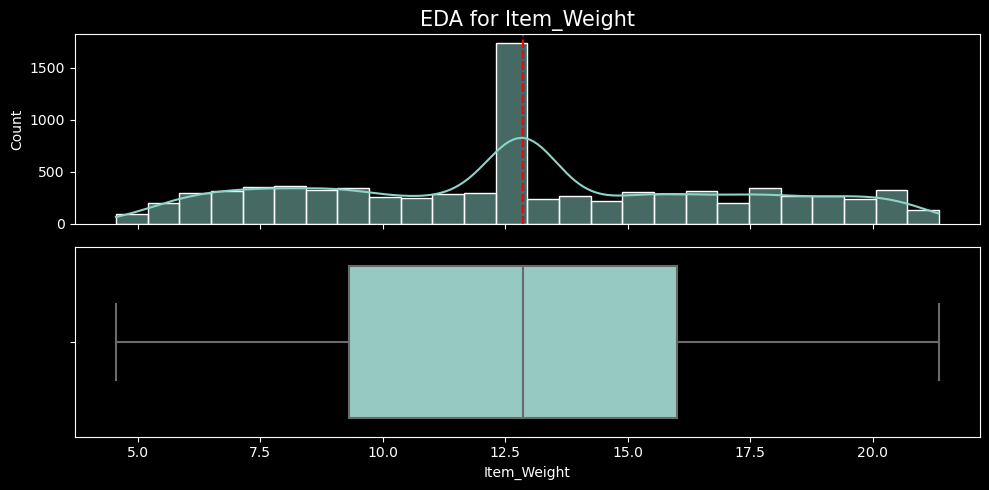

In [84]:
plot_numeric(df1,'Item_Weight')

**Interpretation:**
*   The graph shows that the median is approximately 12.5. So, we can impute the 'Item_weight' column with the median value.
*   The boxplot shows that there are no outliers.

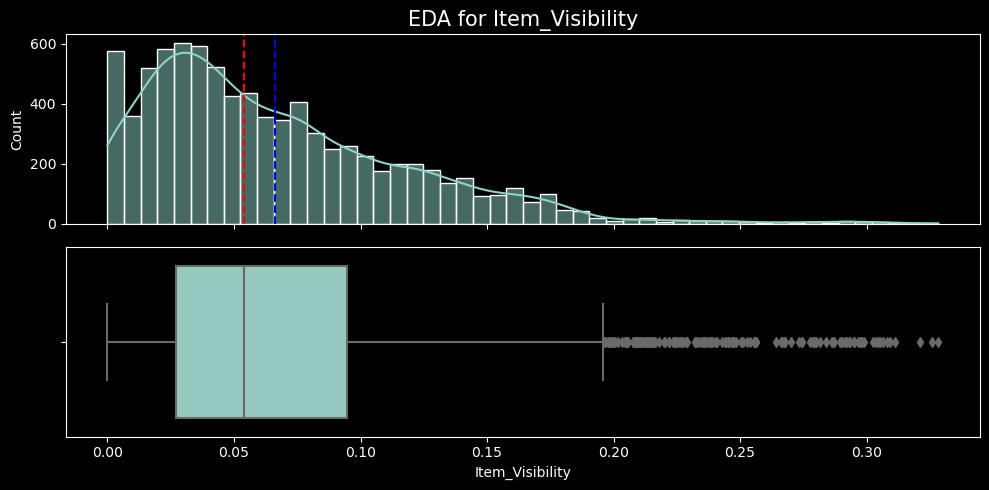

In [85]:
plot_numeric(df1,'Item_Visibility')

**Interpretation:**
*   The median in the graph is around 5%. So, We assume that we will have about 5% of total display area of all products in a store allocated to the particular product.
*   The boxplot shows that there are outliers.

In [86]:
# Make an EDA function
def plot_bar(data,x, y, figsize=(10,5)):
    # Make a larger fig/ax before plotting
    fig, ax = plt.subplots(figsize=figsize)

    ## count and sort the values
    counts = df1[x].value_counts().sort_values(ascending=False).to_frame()

    ## plot the barplot
    sns.barplot(data=counts,x=counts.index, y = counts[x],ax=ax)
    plt.xticks(rotation= 90)
    ax.set_title(f'EDA for {y}', fontsize = 20);
    ax.set_xlabel(f'{y}', fontsize = 20)
    ax.set_ylabel('Counts', fontsize = 20)

    return fig,ax

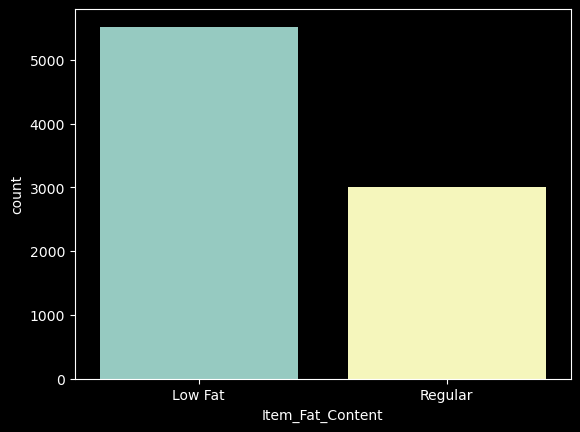

In [87]:
sns.countplot(data = df1, x = 'Item_Fat_Content');

**Interpretation:**
*   The 'Low Fat' is frequent in the 'Item_Fat_Content' column.

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64


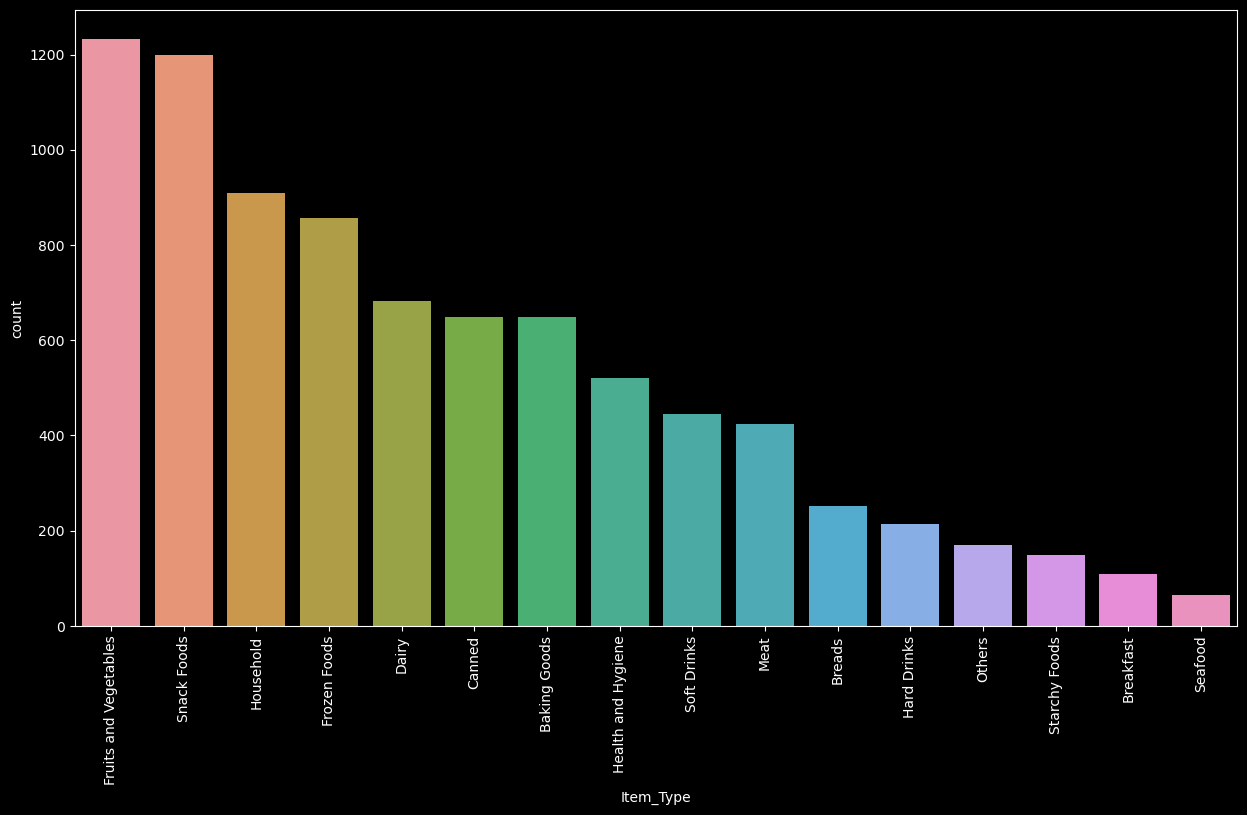

In [88]:
plt.figure(figsize=(15,8))
sns.countplot(data=df1, x='Item_Type', order=df1['Item_Type'].value_counts().index)
plt.xticks(rotation=90)
print(df1['Item_Type'].value_counts())

**Interpretation:**
*   The graph shows that the most common type is 'Fruits and Vegetables'.

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64


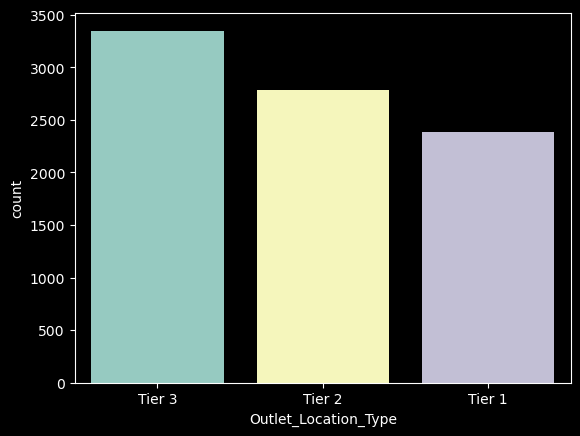

In [89]:
sns.countplot(data = df1, x = 'Outlet_Location_Type', order=df1['Outlet_Location_Type'].value_counts().index);
print(df1['Outlet_Location_Type'].value_counts())

**Interpretation:**
*   The graph shows that the most of stores are located in 'Tier 3'.

In [92]:
df1.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [98]:
numeric_columns = df1.select_dtypes(include=[float, int]).columns.tolist()
numeric_df = df1[numeric_columns]

In [99]:
# Check for correlations
cor = numeric_df.corr()
cor

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


<Axes: >

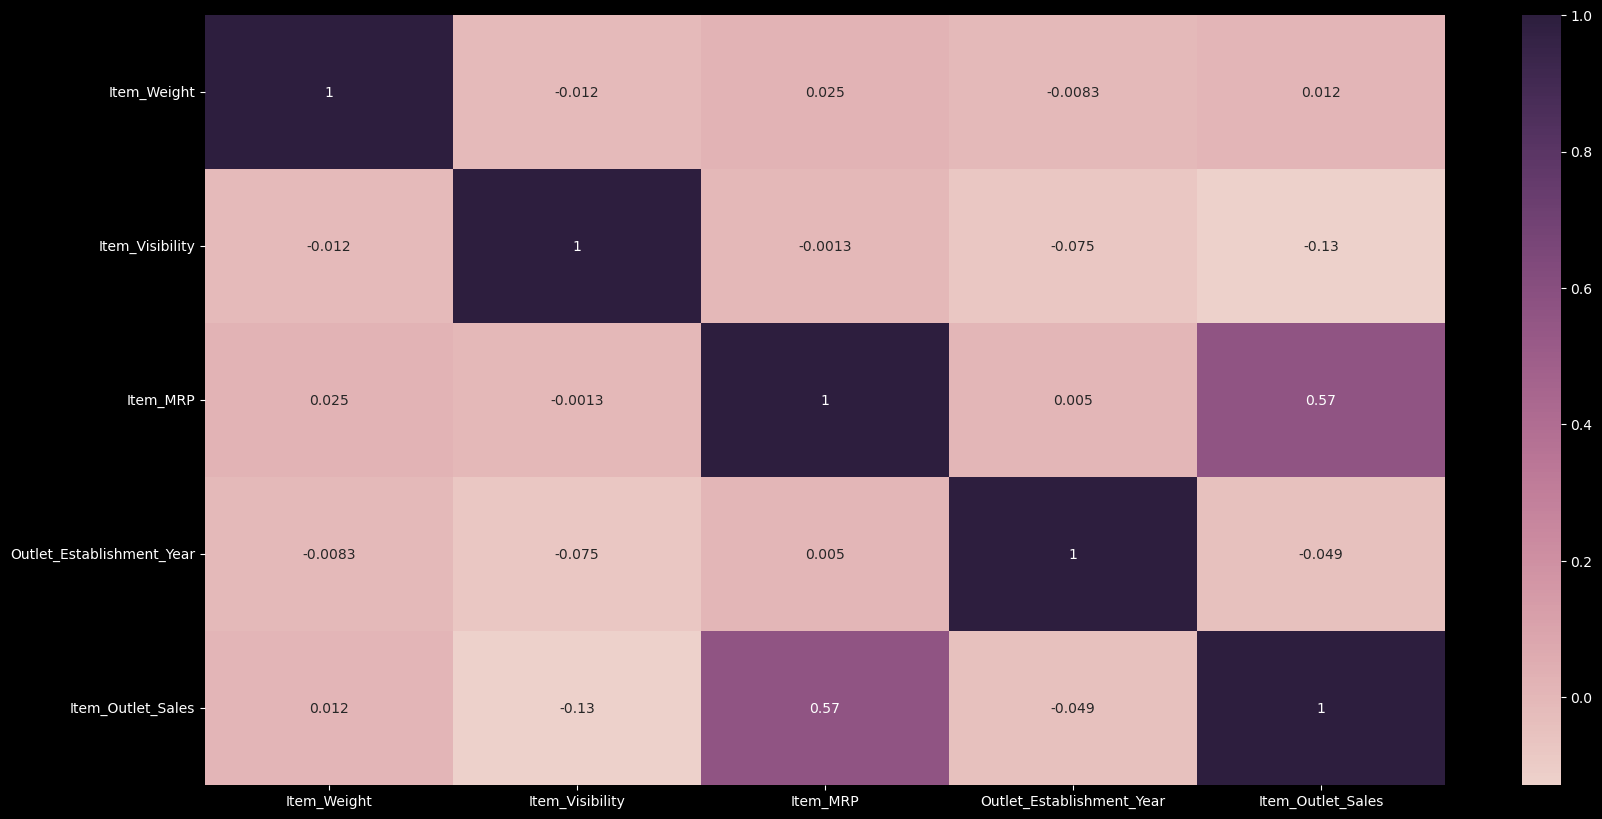

In [100]:
plt.figure(figsize=(20,10))
sns.heatmap(cor, cmap=sns.cubehelix_palette(as_cmap=True), annot=True)

**Interpretation:**
*   The heatmap shows weak correlation between features.
*   There is a moderate positive correlation between the 'Item_Outlet_Sales' and the 'Item_MRP'.



# **Part 4: Explanatory Visuals & Analysis**

Our task is to build several data visualizations to help your stakeholders better understand trends in the data:

*   Build on your previous cleaning, exploration, and analysis.  
*   Create a minimum of two data visualizations that help others understand trends in the data (explanatory data analysis).
*   Since these graphs are for reporting purposes, make sure they look nice by including titles, legends, etc.

In [101]:
avg1 = df1.groupby('Outlet_Identifier')['Item_Outlet_Sales'].mean().sort_values(ascending=False)
avg1

Outlet_Identifier
OUT027    3694.038558
OUT035    2438.841866
OUT049    2348.354635
OUT017    2340.675263
OUT013    2298.995256
OUT046    2277.844267
OUT045    2192.384798
OUT018    1995.498739
OUT019     340.329723
OUT010     339.351662
Name: Item_Outlet_Sales, dtype: float64

C:\Users\HpPavilion\AppData\Local\Temp\ipykernel_672\2582243595.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df1,x='Outlet_Identifier', y = 'Item_Outlet_Sales', order = avg1.index, ci = None)


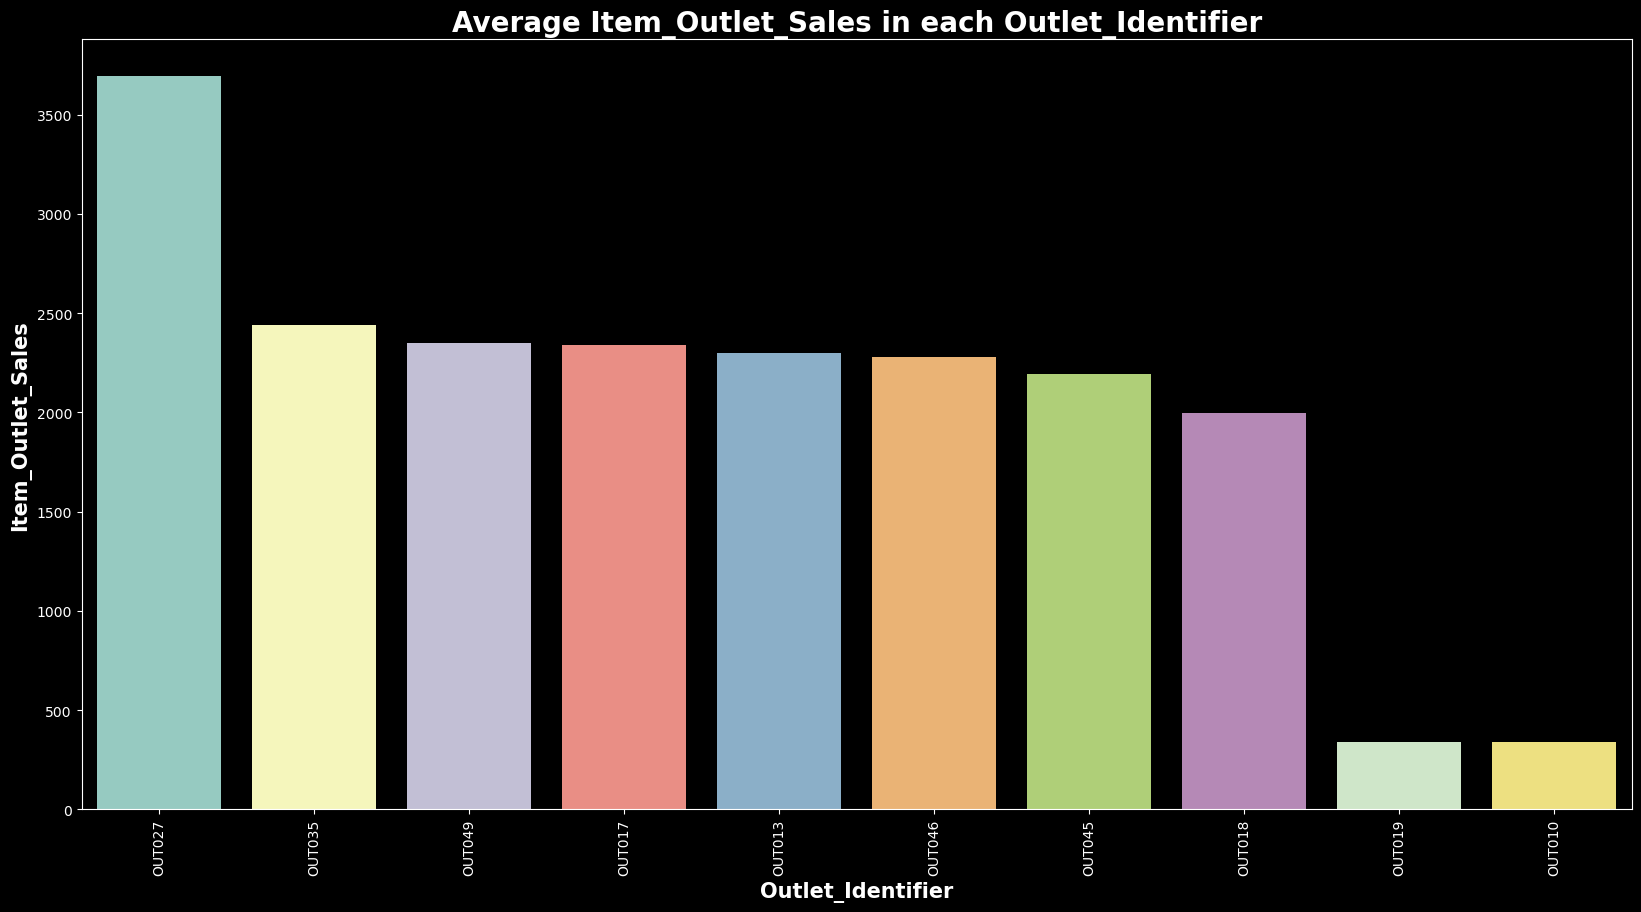

In [102]:
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.barplot(data=df1,x='Outlet_Identifier', y = 'Item_Outlet_Sales', order = avg1.index, ci = None)
plt.xticks(rotation = 90)
ax.set_title('Average Item_Outlet_Sales in each Outlet_Identifier', fontsize = 20, fontweight = 'bold');
ax.set_xlabel('Outlet_Identifier', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('Item_Outlet_Sales', fontsize = 15, fontweight = 'bold');

**Interpretation:**
*   The graph shows that we have more than 3500 of sales in the outlet 'OUT027'.


In [103]:
avg2 = df1.groupby('Item_Type')['Item_Outlet_Sales'].mean().sort_values(ascending=False)
avg2

Item_Type
Starchy Foods            2374.332773
Seafood                  2326.065928
Fruits and Vegetables    2289.009592
Snack Foods              2277.321739
Household                2258.784300
Dairy                    2232.542597
Canned                   2225.194904
Breads                   2204.132226
Meat                     2158.977911
Hard Drinks              2139.221622
Frozen Foods             2132.867744
Breakfast                2111.808651
Health and Hygiene       2010.000265
Soft Drinks              2006.511735
Baking Goods             1952.971207
Others                   1926.139702
Name: Item_Outlet_Sales, dtype: float64

C:\Users\HpPavilion\AppData\Local\Temp\ipykernel_672\875050041.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df1,x='Item_Type', y = 'Item_Outlet_Sales', order = avg2.index, ci = None)


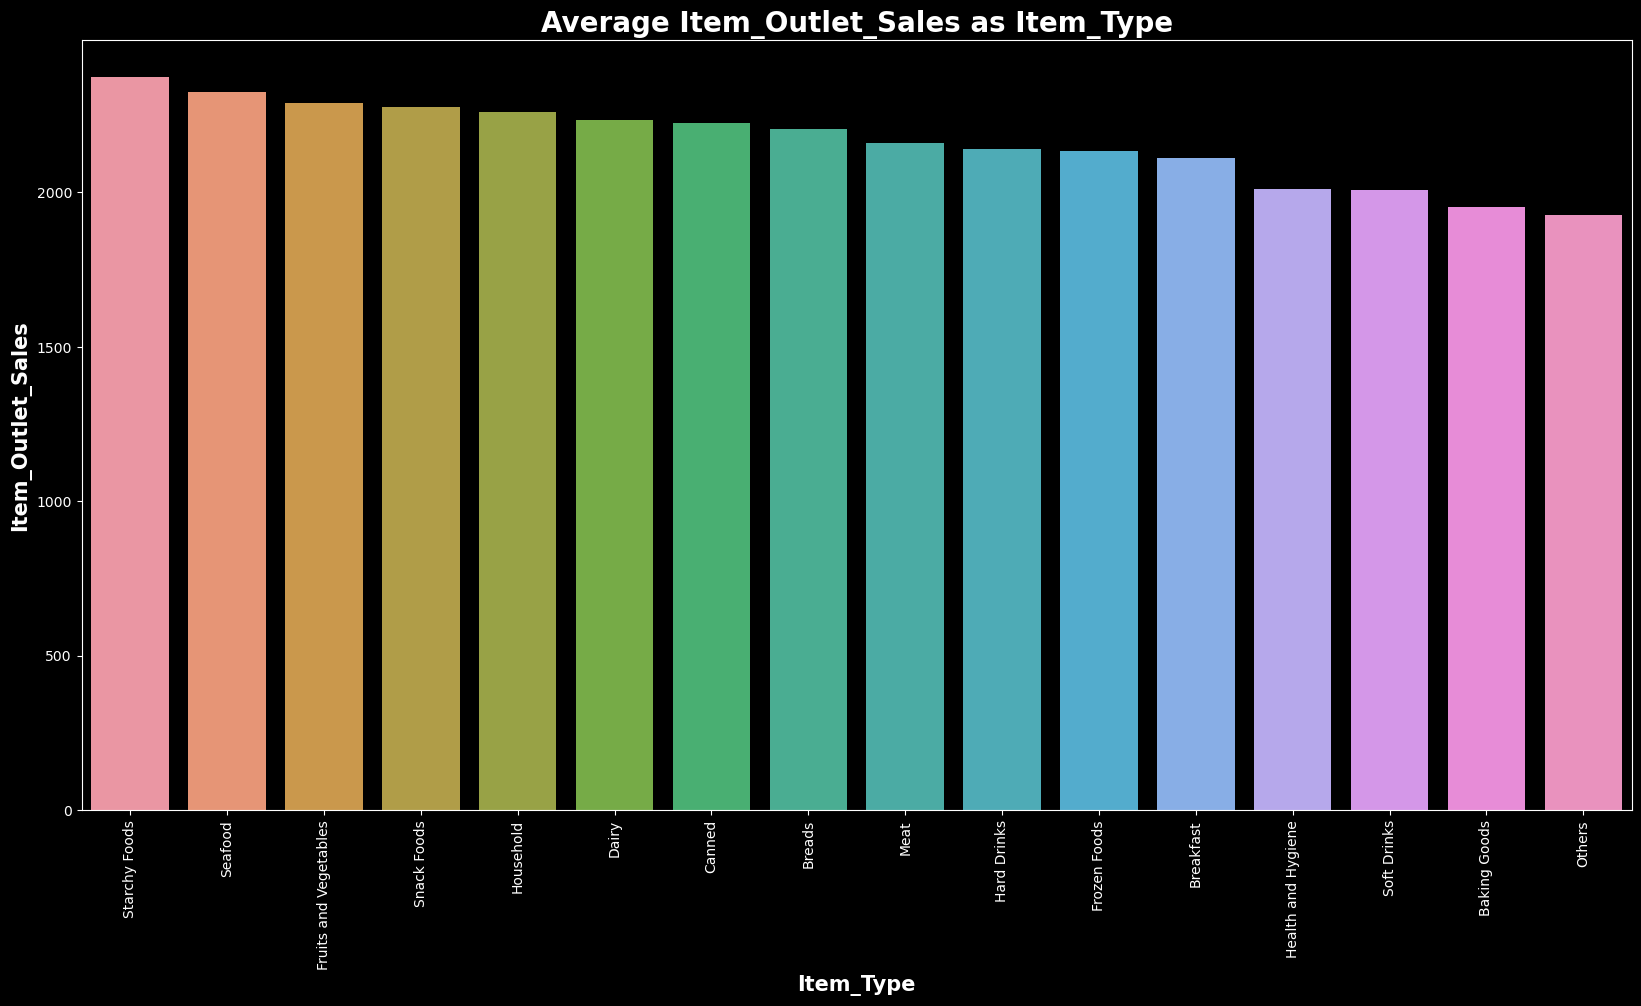

In [104]:
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.barplot(data=df1,x='Item_Type', y = 'Item_Outlet_Sales', order = avg2.index, ci = None)
plt.xticks(rotation = 90)
ax.set_title('Average Item_Outlet_Sales as Item_Type', fontsize = 20, fontweight = 'bold');
ax.set_xlabel('Item_Type', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('Item_Outlet_Sales', fontsize = 15, fontweight = 'bold');

**Interpretation:**
*   The graph clearly indicates that starchy foods are leading in terms of sales.


In [105]:
df['Outlet_Location_Type'].value_counts()

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

C:\Users\HpPavilion\AppData\Local\Temp\ipykernel_672\1372701956.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)
C:\Users\HpPavilion\AppData\Local\Temp\ipykernel_672\1372701956.py:6: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.locator_params(axis='x', nbins=3)


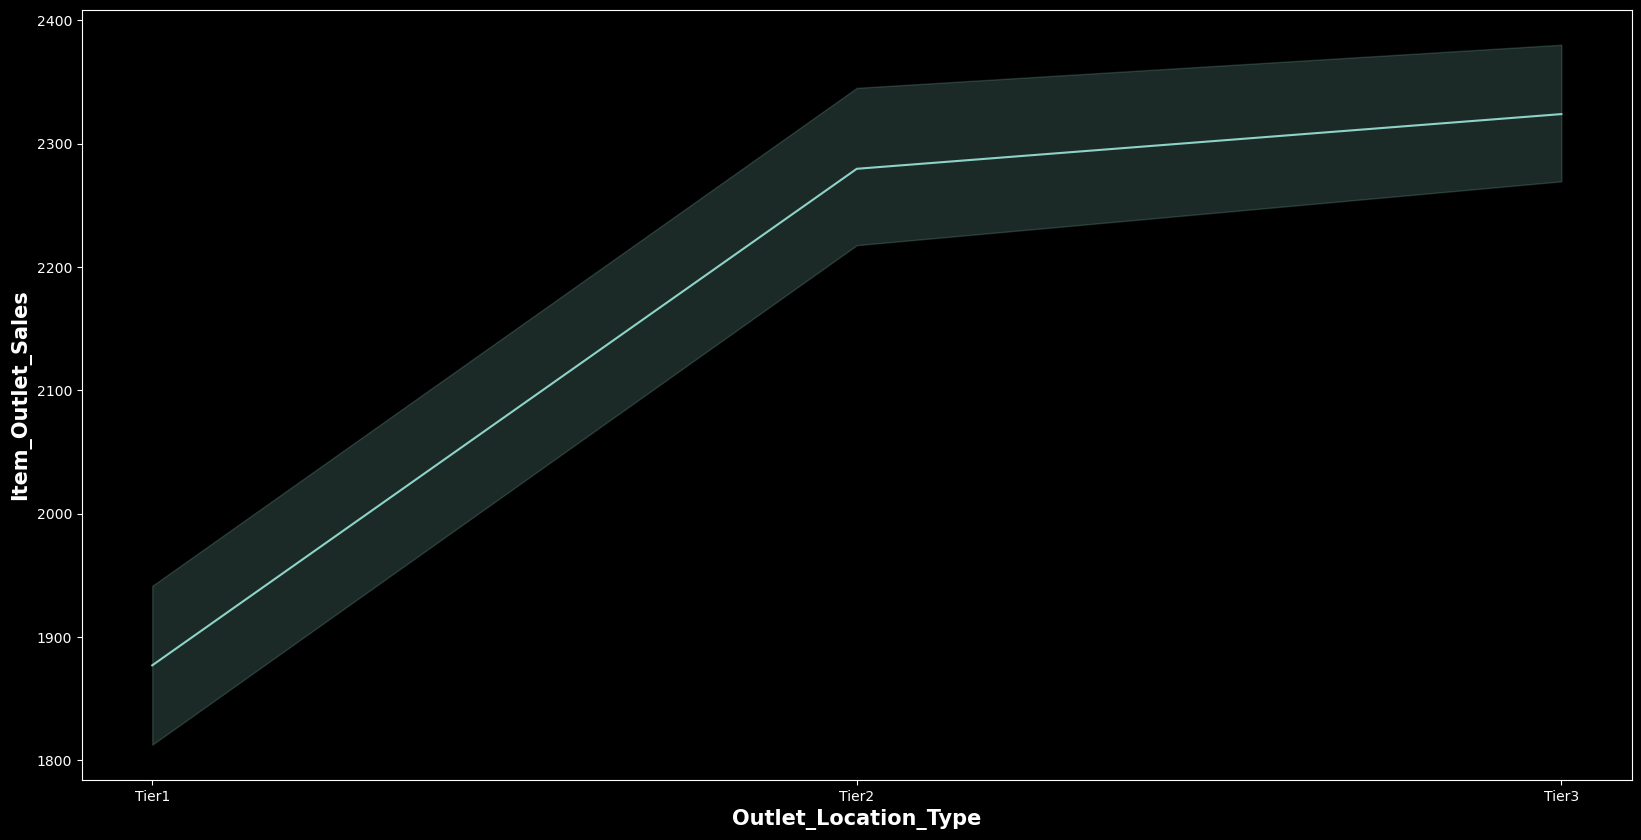

In [106]:
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.lineplot(data=df,x = 'Outlet_Location_Type', y = 'Item_Outlet_Sales')
ax.set_title('', fontsize = 20, fontweight = 'bold');
labels = ['Tier1', 'Tier2', 'Tier3']
ax.set_xticklabels(labels)
plt.locator_params(axis='x', nbins=3)
ax.set_xlabel(f'Outlet_Location_Type', fontsize = 15, fontweight = 'bold')
ax.set_ylabel(f'Item_Outlet_Sales', fontsize = 15, fontweight = 'bold');

**Interpretation:**
*   The graph provides a visual representation that highlights the outlet situated in 'Tier3' as having the highest sales.

# **Part 5: Preprocesing for Machine Learning**

Start our cleaning process over to ensure there is no data leakage!
*   Before splitting our data, we can drop duplicates and fix inconsistencies in categorical data.
*   Identify the features (X) and target (y).
*   Create a preprocessing object to prepare the dataset for Machine Learning.
*   Make sure our imputation of missing values occurs after the train test split using SimpleImputer.






## Import Libraries

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn import set_config

## Copy Data

In [108]:
df2 = df.copy()

## Load Data

In [109]:
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Data Preprocessing

In [110]:
# Check for duplicates
df2.duplicated().sum()

0

In [111]:
# Datatypes of each variable
df2.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [112]:
# Fix any inconsistency in the 'Item_Fat_Content' column
df2.replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg':'Regular'},inplace=True)
df2['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [113]:
# Identify the features (X) and target (y)
X = df2.drop(columns = 'Item_Outlet_Sales')
y = df2['Item_Outlet_Sales']

In [114]:
# Perform a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

**Numeric Data**

In [115]:
# Creating a numeric data selector
num_selector = make_column_selector(dtype_include='number')
num_selector(X_train)

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']

In [116]:
# Creating scaler object to scale the data
scaler = StandardScaler()
median_impute = SimpleImputer(strategy='median')

In [117]:
num_pipe=make_pipeline(scaler, median_impute)
num_pipe

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('simpleimputer', SimpleImputer(strategy='median'))])

In [118]:
# test num_pipe
num_pipe.fit_transform(X_train[num_selector(X_train)])

array([[ 0.74311896, -0.71277507,  1.82810922,  1.32784893],
       [ 0.50587592, -1.29105225,  0.60336888,  1.32784893],
       [-0.11958298,  1.81331864,  0.24454056,  0.13618724],
       ...,
       [ 1.01271331, -0.92052713,  1.52302674,  0.49368575],
       [ 1.60582089, -0.2277552 , -0.38377708,  1.0895166 ],
       [ 0.74311896, -0.95867683, -0.73836105, -0.10214509]])

**Categorical Data**

In [170]:
# Creating a categorical data selector
cat_selector = make_column_selector(dtype_include='object')

In [120]:
# instantiate the OneHotEncoder and the imputer
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
freq_imputer = SimpleImputer(strategy='most_frequent')

In [121]:
# Define pipeline
cat_pipe = make_pipeline(ohe, freq_imputer)
cat_pipe

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False)),
                ('simpleimputer', SimpleImputer(strategy='most_frequent'))])

In [122]:
# test cat_pipe
cat_pipe.fit_transform(X_train[cat_selector(X_train)])

C:\Users\HpPavilion\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [123]:
# Setup the tuples to pair the processors with the make column selectors
num_tuple = (num_pipe, num_selector)
cat_tuple = (cat_pipe, cat_selector)

In [124]:
# Instantiate the make column transformer
col_transformer = make_column_transformer(num_tuple, cat_tuple, remainder='passthrough')
col_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler()),
                                                 ('simpleimputer',
                                                  SimpleImputer(strategy='median'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001EA5738F910>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False,
                                                                sparse_output=False)),
                                                 ('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001EA5738E350>)])

In [126]:
# Fit the column transformer on the X_train
X_train_processed = col_transformer.fit(X_train)
feature_names = X_train_processed.get_feature_names_out()
feature_names

C:\Users\HpPavilion\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array(['pipeline-1__Item_Weight', 'pipeline-1__Item_Visibility',
       'pipeline-1__Item_MRP', ...,
       'pipeline-2__Outlet_Type_Supermarket Type1',
       'pipeline-2__Outlet_Type_Supermarket Type2',
       'pipeline-2__Outlet_Type_Supermarket Type3'], dtype=object)

## Remaking Our X_train and X_test as DataFrames with the New Feature Names

In [130]:
# Transform the training data
X_train_processed = col_transformer.transform(X_train)
# Change the X_train transformed columns to a dataframe
X_train_df = pd.DataFrame(X_train_processed, columns = feature_names, index = X_train.index)
# View the processed training data
X_train_df.head()

,pipeline-1__Item_Weight,pipeline-1__Item_Visibility,pipeline-1__Item_MRP,pipeline-1__Outlet_Establishment_Year,pipeline-2__Item_Identifier_DRA12,pipeline-2__Item_Identifier_DRA24,pipeline-2__Item_Identifier_DRA59,pipeline-2__Item_Identifier_DRB01,pipeline-2__Item_Identifier_DRB13,pipeline-2__Item_Identifier_DRB24,...,pipeline-2__Outlet_Size_Medium,pipeline-2__Outlet_Size_Small,pipeline-2__Outlet_Size_nan,pipeline-2__Outlet_Location_Type_Tier 1,pipeline-2__Outlet_Location_Type_Tier 2,pipeline-2__Outlet_Location_Type_Tier 3,pipeline-2__Outlet_Type_Grocery Store,pipeline-2__Outlet_Type_Supermarket Type1,pipeline-2__Outlet_Type_Supermarket Type2,pipeline-2__Outlet_Type_Supermarket Type3
4776,0.743119,-0.712775,1.828109,1.327849,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7510,0.505876,-1.291052,0.603369,1.327849,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5828,-0.119583,1.813319,0.244541,0.136187,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5327,-1.063163,-1.004931,-0.952591,0.732018,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4810,1.390145,-0.965484,-0.336460,0.493686,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [131]:
# Transform the testing data
X_test_processed = col_transformer.transform(X_test)
# Change the X_test transformed columns to a dataframe
X_test_df = pd.DataFrame(X_test_processed, columns = feature_names, index = X_test.index)
X_test_df.head()

,pipeline-1__Item_Weight,pipeline-1__Item_Visibility,pipeline-1__Item_MRP,pipeline-1__Outlet_Establishment_Year,pipeline-2__Item_Identifier_DRA12,pipeline-2__Item_Identifier_DRA24,pipeline-2__Item_Identifier_DRA59,pipeline-2__Item_Identifier_DRB01,pipeline-2__Item_Identifier_DRB13,pipeline-2__Item_Identifier_DRB24,...,pipeline-2__Outlet_Size_Medium,pipeline-2__Outlet_Size_Small,pipeline-2__Outlet_Size_nan,pipeline-2__Outlet_Location_Type_Tier 1,pipeline-2__Outlet_Location_Type_Tier 2,pipeline-2__Outlet_Location_Type_Tier 3,pipeline-2__Outlet_Type_Grocery Store,pipeline-2__Outlet_Type_Supermarket Type1,pipeline-2__Outlet_Type_Supermarket Type2,pipeline-2__Outlet_Type_Supermarket Type3
7503,0.300984,-0.776646,-0.998816,-1.293807,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2957,-1.072869,0.100317,-1.585194,-0.102145,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7031,0.344119,-0.482994,-1.595784,0.136187,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1084,-0.054880,-0.415440,0.506592,-1.532139,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
856,-0.584364,-1.047426,0.886725,0.732018,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [132]:
# Confirm the first 3 rows index in y_test matches X_test_df
y_test.head(3)

7503    1743.0644
2957     356.8688
7031     377.5086
Name: Item_Outlet_Sales, dtype: float64

# Part 6: Modeling, Evaluation & Deployment

The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in predicting sales.
1. Our first task is to build a linear regression model to predict sales.
*   Build a linear regression model.
*   Evaluate the performance of your model based on r^2.
*   Evaluate the performance of your model based on rmse.
2. Our second task is to build a regression tree model to predict sales.
*   Build a simple regression tree model.
*   Compare the performance of your model based on r^2.
*   Compare the performance of your model based on rmse.
3. We now have tried 2 different models on your data set. We need to determine which model to implement.
*   Overall, which model do we recommend?
*   Justify our recommendation.
4. To finalize this project, complete a README in our GitHub repository including:
*   An overview of the project.
*   2 relevant insights from the data (supported with reporting quality visualizations).
*   Summary of the model and its evaluation metrics.
*   Final recommendations.

## Import Libraries

In [133]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor

## Drop column

In [134]:
df2.drop(columns='Item_Identifier', inplace=True)

## Linear Regression

In [135]:
# Make a linear regression
linreg = LinearRegression()
linreg

LinearRegression()

In [155]:
# Fit the model
linreg.fit(X_train_df, y_train)

LinearRegression()

In [156]:
# Get the predictions
training_predictions = linreg.predict(X_train_df)
test_predictions = linreg.predict(X_test_df)

In [157]:
# Define an Evaluate function
def eval_model(true, pred):
  mae = mean_absolute_error(true, pred)
  mse = mean_squared_error(true, pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(true,pred)
  print(f' MAE: {mae:,.2f} \n MSE: {mse:,.2f} \n RMSE: {rmse:,.2f} \n R2: {r2:,.2f}')

In [158]:
# Evaluate the model
print('Train Evaluation')
eval_model(y_train, linreg.predict(X_train_df))
print('Test Evaluation')
eval_model(y_test, linreg.predict(X_test_df))

Train Evaluation
 MAE: 735.97 
 MSE: 971,791.66 
 RMSE: 985.79 
 R2: 0.67
Test Evaluation
 MAE: 312,878,831,884.88 
 MSE: 43,696,625,132,163,002,875,772,928.00 
 RMSE: 6,610,342,285,552.47 
 R2: -15,837,979,285,034,696,704.00


**Interpretation:**
*   We have good R2 and RMSE scores for the training dataset. However, it performs extremely bad on the testing dataset.  
*   The linear regression has fallen into the trap of overfitting.

## Extract and visualize the coefficients

In [166]:
# Extraxt coefficients 
def get_coeffs_linreg(linreg, feature_names = None, sort=True,ascending=True,
                     name='LinearRegression Coefficients'):
    if feature_names is None:
        feature_names = linreg.feature_names_in_
    ## Saving the coefficients
    coeffs = pd.Series(linreg.coef_, index= feature_names)
    coeffs['intercept'] = linreg.intercept_
    if sort==True:
        coeffs = coeffs.sort_values(ascending=ascending)
    return coeffs

In [160]:
coeffs = get_coeffs_linreg(linreg)
coeffs

pipeline-2__Outlet_Identifier_OUT018        -1.399975e+15
pipeline-2__Outlet_Type_Supermarket Type3   -8.679242e+14
pipeline-2__Outlet_Size_nan                 -5.387464e+14
pipeline-2__Item_Type_Soft Drinks           -5.184299e+14
pipeline-2__Outlet_Size_High                -4.945246e+14
                                                 ...     
pipeline-2__Outlet_Identifier_OUT010         3.195040e+14
pipeline-2__Outlet_Identifier_OUT017         5.357991e+14
pipeline-2__Outlet_Identifier_OUT045         5.516979e+14
pipeline-2__Outlet_Type_Supermarket Type2    6.984702e+14
intercept                                    7.983733e+14
Length: 1594, dtype: float64

In [163]:
# Annotating Horizontal Graphs
def annotate_hbars(ax, ha='left', va='center', size=12, xytext=(4,0),
                  textcoords='offset points'):
    for bar in ax.patches:
    
        ## calculate center of bar
        bar_ax = bar.get_y() + bar.get_height() / 2
        ## get the value to annotate
        val = bar.get_width()
        if val < 0:
            val_pos = 0
        else:
            val_pos = val
        # ha and va stand for the horizontal and vertical alignment
        ax.annotate(f"{val:.3f}", (val_pos,bar_ax), ha=ha, va=va, size=size,
                        xytext=xytext, textcoords=textcoords)

In [164]:
# Plot coefficients 
def plot_coeffs(coeffs, top_n=None, figsize=(4,5), 
                intercept=False, intercept_name="intercept", 
                annotate=False, ha='left', va='center', size=12, 
                xytext=(4,0), textcoords='offset points'):
    """ Plots the top_n coefficients from a Series, with optional annotations.
    """
    # Drop intercept if intercept=False and 
    if (intercept == False) & (intercept_name in coeffs.index):
        coeffs = coeffs.drop(intercept_name)
    if top_n == None:
        ## sort all features and set title
        plot_vals = coeffs.sort_values()
        title = "All Coefficients - Ranked by Magnitude"
    else:
        ## rank the coeffs and select the top_n
        coeff_rank = coeffs.abs().rank().sort_values(ascending=False)
        top_n_features = coeff_rank.head(top_n)
        
        ## sort features and keep top_n and set title
        plot_vals = coeffs.loc[top_n_features.index].sort_values()
        title = f"Top {top_n} Largest Coefficients"
    ## plotting top N importances
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Coefficient', 
            ylabel='Feature Names', 
            title=title)
    ax.axvline(0, color='k')
    if annotate == True:
        annotate_hbars(ax, ha=ha, va=va, size=size, xytext=xytext, textcoords=textcoords)
    return ax

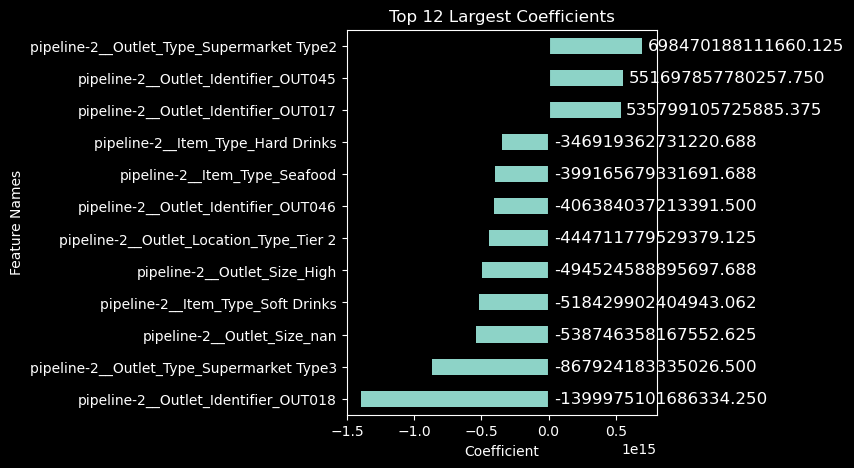

In [165]:
plot_coeffs(coeffs,top_n=12,annotate=True);

**Interpretation:**
- pipeline-2__Outlet_Type_Supermarket Type2, pipeline-2__Outlet_Identifier_OUT045 and pipeline-2__Outlet_Identifier_OUT017 are the most impactful features. 

## Decision Tree

In [171]:
# Make a decision Tree
Dec_Tree = DecisionTreeRegressor(random_state=42)
Dec_Tree

DecisionTreeRegressor(random_state=42)

In [172]:
# Fit the model
Dec_Tree.fit(X_train_df, y_train)

DecisionTreeRegressor(random_state=42)

In [173]:
# Get the predictions
training_predictions = Dec_Tree.predict(X_train_df)
test_predictions = Dec_Tree.predict(X_test_df)

In [174]:
# Evaluate the model
print('Train Evaluation')
eval_model(y_train, Dec_Tree.predict(X_train_df))
print('Test Evaluation')
eval_model(y_test, Dec_Tree.predict(X_test_df))

Train Evaluation
 MAE: 0.00 
 MSE: 0.00 
 RMSE: 0.00 
 R2: 1.00
Test Evaluation
 MAE: 995.41 
 MSE: 2,140,427.72 
 RMSE: 1,463.02 
 R2: 0.22


**Interpretation:**
*   The model has performed very well on the training dataset.
*   For the testing dataset, it performs poorly bad.
*   This model could likely demonstrate even better result through tuning with adjustments some parameters.

## Tunned Decision Tree

In [175]:
# Get the parameters
Dec_Tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [176]:
# Get the depth of the decision tree
Dec_Tree.get_depth()

60

In [177]:
import warnings
warnings.filterwarnings('ignore')

In [180]:
# Finding the Optimal max_depth
depths=range(1,60,1)
scores1=pd.DataFrame(index=depths, columns=['Train', 'Test'])
# Loop through depths
for depth in depths:
  dec_reg = DecisionTreeRegressor(max_depth=depth, random_state = 42)
  dec_reg.fit(X_train_df, y_train)
# Get predictions
  dec_train_preds = dec_reg.predict(X_train_df)
  dec_test_preds = dec_reg.predict(X_test_df)
# Calculate scores
  train_r2score = r2_score(y_train, dec_train_preds)
  test_r2score = r2_score(y_test, dec_test_preds)
# store the scores in a dataframe
  scores1.loc[depth, 'Train'] = train_r2score
  scores1.loc[depth, 'Test'] = test_r2score
scores1

,Train,Test
1,0.237797,0.229683
2,0.431641,0.433778
3,0.524218,0.524222
4,0.582705,0.583937
5,0.604207,0.596056
6,0.615702,0.584668
7,0.629269,0.577437
8,0.641334,0.556489
9,0.653613,0.545667
10,0.666255,0.532842


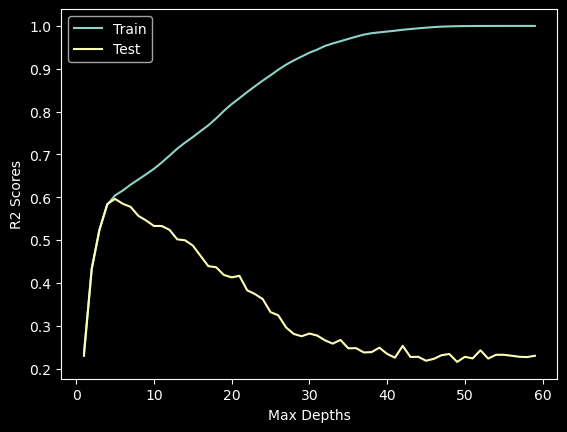

In [181]:
#plot the scores to visually determine the best max_depth
plt.plot(depths, scores1['Train'], label = 'Train')
plt.plot(depths, scores1['Test'], label = 'Test')
plt.ylabel('R2 Scores')
plt.xlabel('Max Depths')
plt.legend()
plt.show()

In [182]:
# Sort the dataframe by test scores and save the index (k) of the best score
best_depth_Dec = scores1.sort_values(by='Test', ascending=False).index[0]
best_depth_Dec

5

In [183]:
# Evaluate the Decision Tree model
best_tree = DecisionTreeRegressor(max_depth=best_depth_Dec)
best_tree.fit(X_train_df, y_train)

print('Training Scores for High Variance Decision Tree')
eval_model(y_train, best_tree.predict(X_train_df))
print('Testing Scores for High Variance Decision Tree')
eval_model(y_test, best_tree.predict(X_test_df))

Training Scores for High Variance Decision Tree
 MAE: 761.98 
 MSE: 1,171,332.78 
 RMSE: 1,082.28 
 R2: 0.60
Testing Scores for High Variance Decision Tree
 MAE: 737.04 
 MSE: 1,114,615.86 
 RMSE: 1,055.75 
 R2: 0.60


**Interpretation:**
*   By tuning the model, we have managed to enhance the R2 and RMSE scores. However, an R2 score of 60% is not very high.
*   We might find better results utilizing the random forest.

## Random Forest

In [184]:
# Make an instance of the model
Rad_Tree = RandomForestRegressor(random_state = 42)

In [185]:
# Fit the model using your training data
Rad_Tree.fit(X_train_df, y_train)

RandomForestRegressor(random_state=42)

In [186]:
# Get the predictions
training_predictions = Rad_Tree.predict(X_train_df)
test_predictions = Rad_Tree.predict(X_test_df)

In [187]:
# Evaluate the model
print('Train Evaluation')
eval_model(y_train, Rad_Tree.predict(X_train_df))
print('Test Evaluation')
eval_model(y_test, Rad_Tree.predict(X_test_df))

Train Evaluation
 MAE: 297.34 
 MSE: 184,370.32 
 RMSE: 429.38 
 R2: 0.94
Test Evaluation
 MAE: 771.85 
 MSE: 1,239,187.75 
 RMSE: 1,113.19 
 R2: 0.55


## Extract and visualize the feature importances

In [193]:
# Get importances
def get_importances(model, feature_names=None,name='Feature Importance',
                   sort=False, ascending=True):
    
    ## checking for feature names
    if feature_names == None:
        feature_names = model.feature_names_in_
        
    ## Saving the feature importances
    importances = pd.Series(model.feature_importances_, index= feature_names,
                           name=name)
    
    # sort importances
    if sort == True:
        importances = importances.sort_values(ascending=ascending)
        
    return importances

In [194]:
importances = get_importances(Rad_Tree,sort=True,ascending=False,
                              name="RandomForest Importances")
importances 

pipeline-1__Item_MRP                     4.016226e-01
pipeline-2__Outlet_Type_Grocery Store    1.917298e-01
pipeline-1__Item_Visibility              5.718473e-02
pipeline-2__Outlet_Identifier_OUT027     3.525805e-02
pipeline-1__Item_Weight                  2.951304e-02
                                             ...     
pipeline-2__Item_Identifier_FDG12        3.591140e-08
pipeline-2__Item_Identifier_DRH59        2.812203e-08
pipeline-2__Item_Identifier_FDT51        2.795050e-08
pipeline-2__Item_Identifier_FDQ04        2.470977e-08
pipeline-2__Item_Identifier_DRL59        2.156295e-08
Name: RandomForest Importances, Length: 1593, dtype: float64

In [195]:
# Visualize feature importances
def plot_importance(importances, top_n=None,  figsize=(8,6)):
    # sorting with asc=false for correct order of bars
    if top_n==None:
        ## sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        ## sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Features"
    ## plotting top N importances
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Importance',
            ylabel='Feature Names',
            title=title)
    ## return ax in case want to continue to update/modify figure
    return ax

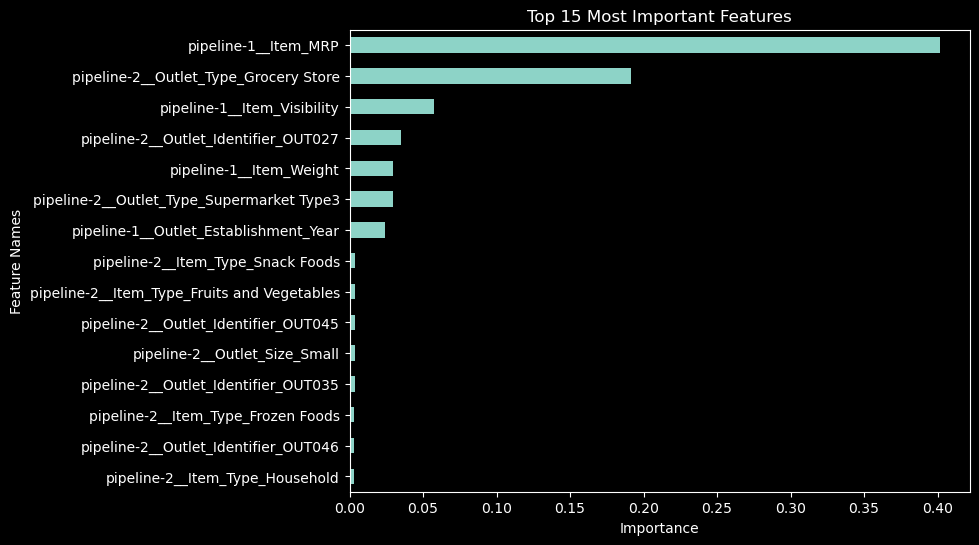

In [199]:
plot_importance(importances,top_n=15);

**Interpretation:**
- pipeline-1__Item_MRP, pipeline-2__Outlet_Type_Grocery Store, pipeline-1__Item_Visibility, pipeline-2__Outlet_Identifier_OUT027 and pipeline-1__Item_Weight are the top 5 most important features.
- pipeline-1__Item_MRP is the most important feature for predicting Item_Outlet_Sales.
- pipeline-2__Outlet_Type_Grocery Store is the second most important feautre.
- pipeline-1__Item_Visibility, pipeline-2__Outlet_Identifier_OUT027, pipeline-1__Item_Weight, pipeline-2__Outlet_Type_Supermarket Type3 and pipeline-1__Outlet_Establishment_Year are somewhat important.   
- The rest of the features are unimportant.

## Tunned Random Forest

In [188]:
# Get the parameters
Rad_Tree.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [189]:
# Choose values for n_estimators to try
n_ests = [50, 100, 200]

# Create a dataframe for the results
scores2 = pd.DataFrame(index=n_ests, columns=['Train', 'Test'])
# Test the different values for n_estimatorsm
for n in n_ests:
  model = RandomForestRegressor(random_state = 42,  max_depth=5, n_estimators=n)
  # Fit the model on training data
  model.fit(X_train_df, y_train)

  # Make predictions on training and testing data
  train_preds = model.predict(X_train_df)
  test_preds = model.predict(X_test_df)

  # Obtain scores and add to scores df
  scores2.loc[n, 'Train'] = r2_score(y_train, train_preds)
  scores2.loc[n, 'Test'] = r2_score(y_test, test_preds)

# View the score dataframe
scores2

,Train,Test
50,0.612246,0.602383
100,0.612179,0.603883
200,0.611942,0.604362


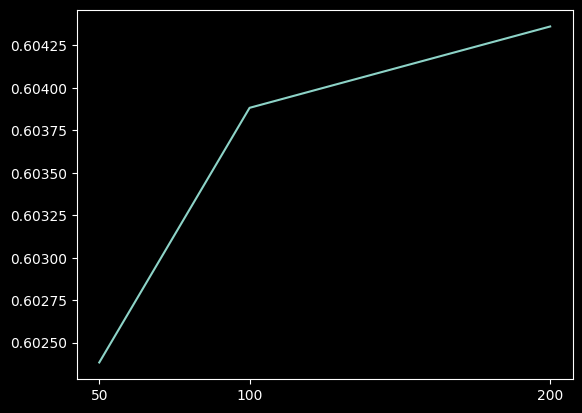

In [ ]:
# Plot the scores
plt.plot(scores2['Test'])
plt.xticks(n_ests);

In [190]:
# Sort by the best score on testing data
best_est_Rad = scores2.sort_values(by='Test', ascending=False).index[0]
best_est_Rad

200

In [191]:
# Evaluate the Bagged Tree model
best_tree = RandomForestRegressor(n_estimators=best_est_Rad, max_depth=5)
best_tree.fit(X_train_df, y_train)

print('Training Scores for High Variance Decision Tree')
eval_model(y_train, best_tree.predict(X_train_df))

print('Testing Scores for High Variance Decision Tree')
eval_model(y_test, best_tree.predict(X_test_df))

Training Scores for High Variance Decision Tree
 MAE: 755.46 
 MSE: 1,147,220.30 
 RMSE: 1,071.08 
 R2: 0.61
Testing Scores for High Variance Decision Tree
 MAE: 727.66 
 MSE: 1,090,498.66 
 RMSE: 1,044.27 
 R2: 0.60


## Serialize Best Models with Joblib

In [203]:
## saving variables for next lesson/notebook
import joblib
## creating a dictionary of all of the variables to save for later
export = {'preprocessor':X_train_processed,
         'X_train':X_train_df,
         'y_train': y_train,
         'X_test':X_test_df,
          "y_test": y_test,
         'RandomForest':Rad_Tree,
         "LinearRegression": linreg}
joblib.dump(export, 'best-models.joblib')

['best-models.joblib']